In [3]:
from sympy import *

In [4]:
cA2, cS, cO, cM = symbols('c_{A_2}, c_{S}, c_{O}, c_{M}')
alpha, beta, theta, phi, delta, ep, lam = symbols('alpha beta theta phi delta epsilon lambda')

In [5]:
m = Rational(2, 1)
cA = 2 * (1 - cA2) - lam * (cS + cM)
dcA2dt = cO * cA - alpha * cM * cA2 - theta * cA2
dcSdt = alpha/lam * cM * cA2 + theta/lam * cA2 - phi * cS - delta * (cS**m - cM)
dcOdt = ep * (1 - cO * cA)
dcMdt = delta * (cS**m - cM) - beta * cM

In [6]:
sol = solve([dcA2dt, dcSdt, dcOdt, dcMdt], (cA2, cS, cO, cM))

In [7]:
cA2_0, cS_0, cO_0, cM_0 = sol[1]

In [8]:
J = Matrix([dcA2dt, dcSdt, dcOdt, dcMdt]).jacobian((cA2, cS, cO, cM))

In [9]:
J0 = J.subs({cA2: cA2_0, cS: cS_0, cO: cO_0, cM: cM_0})

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rr = np.concat([np.linspace(0.4, 1, 10), np.linspace(1.1, 3, 10)])

In [10]:
rel = []
iml = []
rl = []
for r in rr:
    eimg_c = []
    params = np.array([22, 3, 0.55, 18, 1e3, 1e3])/r
    J0_n = J0.subs({alpha: params[0], beta: params[1], theta: params[2], phi: params[3], delta: params[4], ep: params[5], lam: 0.17})
    e = J0_n.eigenvals()
    eimg = [ei for ei in e if im(ei) != 0]
    for i in eimg:
        for j in eimg:
            if i != j and conjugate(i) == j:
                eimg_c = [i, j]
                rl.append(r)
    rel = rel + [re(e) for e in eimg_c]
    iml = iml + [im(e) for e in eimg_c]




In [11]:
import matplotlib.ticker as mticker

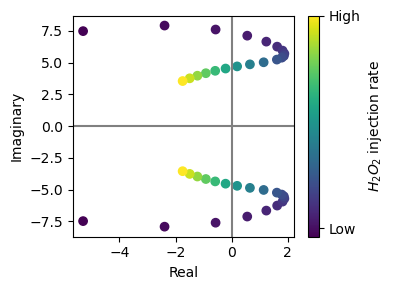

In [12]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.axhline(0, c='grey')
ax.axvline(0, c='grey')
fig.colorbar(ax.scatter(rel, iml, c=rl), ticks=[0.5, 3], format=mticker.FixedFormatter(['Low', 'High']), label='$H_2O_2$ injection rate')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
fig.tight_layout()
fig.savefig('figs\hopf.png', dpi=300)

In [51]:
params = np.array([20, 1, 0.6, 15, 1e3, 1e2])

In [55]:
J0_n = J0.subs({alpha: params[0], beta: params[1], theta: params[2], phi: params[3], delta: params[4], ep: params[5], lam: 0.17})

In [61]:
e = J0_n.eigenvals()

In [ ]:
eimg = [ei for ei in e if im(ei) != 0]

[-135.73474336838 + 1.5219950824308e-63*I,
 0.995698790685563 - 5.45663369341127*I,
 0.995698790685563 + 5.45663369341127*I]